In [1]:
import pandas as pd
import warnings 

warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('train.csv')

In [3]:
dataset.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
def bar_chart(feature):
    survived = dataset[dataset['Survived']==1][feature].value_counts()
    dead = dataset[dataset['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind= 'bar',stacked=True, figsize=(10,5))

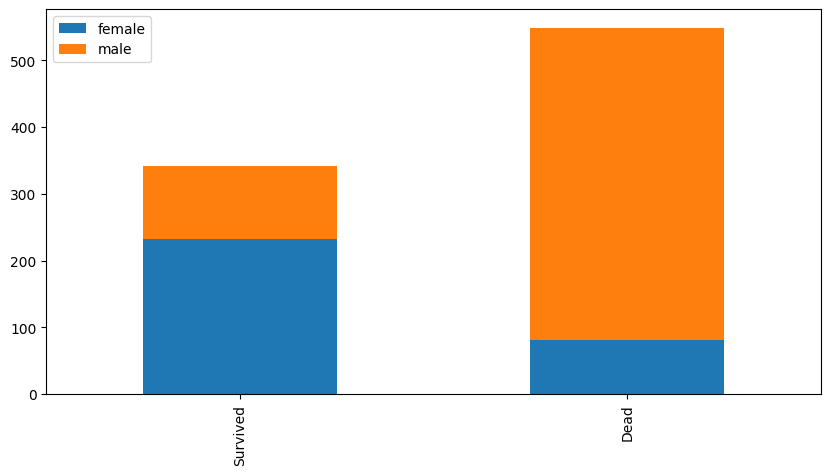

In [5]:
bar_chart('Sex')

In [6]:
import numpy as np

dataset["Sex"]=np.where(dataset["Sex"]=="male",0,1)

In [7]:
#dataset['Sex']

In [8]:
dataset.shape

(891, 12)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train, test = train_test_split(dataset, test_size=0.2, random_state=31)

In [11]:
train.head()

PassengerId  Survived  Pclass                                Name  Sex  \
397          398         0       2             McKane, Mr. Peter David    0   
824          825         0       3        Panula, Master. Urho Abraham    0   
38            39         0       3  Vander Planke, Miss. Augusta Maria    1   
785          786         0       3  Harmer, Mr. Abraham (David Lishin)    0   
737          738         1       1              Lesurer, Mr. Gustave J    0   

      Age  SibSp  Parch    Ticket      Fare Cabin Embarked  
397  46.0      0      0     28403   26.0000   NaN        S  
824   2.0      4      1   3101295   39.6875   NaN        S  
38   18.0      2      0    345764   18.0000   NaN        S  
785  25.0      0      0    374887    7.2500   NaN        S  
737  35.0      0      0  PC 17755  512.3292  B101        C

In [12]:
test.head()

PassengerId  Survived  Pclass                          Name  Sex   Age  \
725          726         0       3           Oreskovic, Mr. Luka    0  20.0   
691          692         1       3            Karun, Miss. Manca    1   4.0   
393          394         1       1        Newell, Miss. Marjorie    1  23.0   
297          298         0       1  Allison, Miss. Helen Loraine    1   2.0   
602          603         0       1     Harrington, Mr. Charles H    0   NaN   

     SibSp  Parch  Ticket      Fare    Cabin Embarked  
725      0      0  315094    8.6625      NaN        S  
691      0      1  349256   13.4167      NaN        C  
393      1      0   35273  113.2750      D36        C  
297      1      2  113781  151.5500  C22 C26        S  
602      0      0  113796   42.4000      NaN        S

In [13]:
features_drop = ['PassengerId','Pclass', 'Name', 'Age', 'SibSp', 
 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
train_selected = train.drop(features_drop, axis=1)

test_selected = test.drop(features_drop, axis=1)

In [14]:
train_selected[:5]

Survived  Sex
397         0    0
824         0    0
38          0    1
785         0    0
737         1    0

In [15]:
test_selected[:5]

Survived  Sex
725         0    0
691         1    1
393         1    1
297         0    1
602         0    0

In [16]:
train_data = train_selected.drop('Survived', axis=1)
target = train_selected['Survived']
train_data.shape, target.shape

((712, 1), (712,))

In [17]:
train_data.head()

Sex
397    0
824    0
38     1
785    0
737    0

In [18]:
target.head()

397    0
824    0
38     0
785    0
737    1
Name: Survived, dtype: int64

In [19]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [22]:
model = gnb.fit(train_data, target)

In [23]:
test_data = test_selected.drop("Survived", axis=1).copy()

In [24]:
prediction = gnb.predict(test_data)

In [25]:
test["prediction"] = prediction

In [26]:
from sklearn.metrics import accuracy_score

score = accuracy_score(test["Survived"], test["prediction"])

In [27]:
score

0.8044692737430168

In [28]:
matrix = confusion_matrix(test["Survived"], prediction)
print(matrix)

[[88 11]
 [24 56]]


In [30]:
print(classification_report(test["Survived"], prediction))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83        99
           1       0.84      0.70      0.76        80

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.80      0.80       179



In [31]:
columns_to_drop = ['Cabin', 'Ticket', 'PassengerId', 'Name']

In [32]:
dataset = dataset.drop(columns=columns_to_drop, axis=1)

In [33]:
dataset.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    0  22.0      1      0   7.2500        S
1         1       1    1  38.0      1      0  71.2833        C
2         1       3    1  26.0      0      0   7.9250        S
3         1       1    1  35.0      1      0  53.1000        S
4         0       3    0  35.0      0      0   8.0500        S

In [34]:
X = dataset.drop(['Survived'], axis=1)
y = dataset['Survived']

print(X.shape)
print(y.shape)

(891, 7)
(891,)


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_train.shape)

(712, 7)
(179, 7)
(712,)
(712,)


In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


In [45]:
X = dataset.drop(['Survived'], axis=1)  
y = dataset['Survived'] 

In [46]:
non_numeric_cols = X.select_dtypes(include=['object']).columns

In [47]:
X = X.drop(columns=non_numeric_cols)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)


In [54]:
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

In [55]:
sc = StandardScaler()
X_train_std = pd.DataFrame(sc.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
X_test_std = pd.DataFrame(sc.transform(X_test), index=X_test.index, columns=X_test.columns)

In [56]:
print("NaN values in X_train_std:", X_train_std.isna().sum().sum())
print("Infinity values in X_train_std:", not (X_train_std == np.inf).all().all() and not (X_train_std == -np.inf).all().all())

NaN values in X_train_std: 0
Infinity values in X_train_std: True


In [57]:
gnb = GaussianNB()
model = gnb.fit(X_train_std, y_train)


In [58]:
predictions = model.predict(X_test_std)

In [59]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 77.09%
